In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
print(sklearn.__version__)

0.20.3


## Import model data and check missing data, feature correlation etc

In [88]:
model_data_raw = pd.read_csv('model_data.csv')

In [89]:
model_data_raw.head()

,Unnamed: 0,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn,n_days_gt10_l30d,avg_bal_gt10_l30d
0,1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0,22,80.800000
1,2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0,22,387.156364
2,3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0,22,49.240000
3,4,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0,22,191.885000
4,5,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0,22,162.414545


In [90]:
## Drop columns not used in the model
model_data = model_data_raw.drop(['Unnamed: 0','user_id'], axis=1)

In [91]:
model_data.shape

(5584, 11)

In [8]:
model_data.dtypes

risk_tolerance                   object
investment_experience            object
liquidity_needs                  object
platform                         object
time_spent                      float64
instrument_type_first_traded     object
first_deposit_amount            float64
time_horizon                     object
churn                             int64
n_days_gt10_l30d                  int64
avg_bal_gt10_l30d               float64
dtype: object

In [9]:
## Check missing data
model_data.isnull().sum()

risk_tolerance                  0
investment_experience           0
liquidity_needs                 0
platform                        0
time_spent                      0
instrument_type_first_traded    0
first_deposit_amount            0
time_horizon                    0
churn                           0
n_days_gt10_l30d                0
avg_bal_gt10_l30d               0
dtype: int64

In [10]:
model_data.describe()

,time_spent,first_deposit_amount,churn,n_days_gt10_l30d,avg_bal_gt10_l30d
count,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000
mean,34.509706,633.566805,0.049248,21.178546,4440.142174
std,155.080551,2118.323263,0.216404,3.133686,15336.285697
min,0.000000,0.000000,0.000000,1.000000,10.000000
25%,2.848908,50.000000,0.000000,22.000000,100.000000
50%,13.474708,100.000000,0.000000,22.000000,539.744545
75%,33.823829,500.000000,0.000000,22.000000,2669.477489
max,8788.329450,50000.000000,1.000000,22.000000,389465.445436


In [11]:
model_data.describe(include=['object', 'category'])

,risk_tolerance,investment_experience,liquidity_needs,platform,instrument_type_first_traded,time_horizon
count,5584,5584,5584,5584,5584,5584
unique,3,4,3,3,11,3
top,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,stock,short_time_horizon
freq,3566,2578,4217,3550,4827,2833


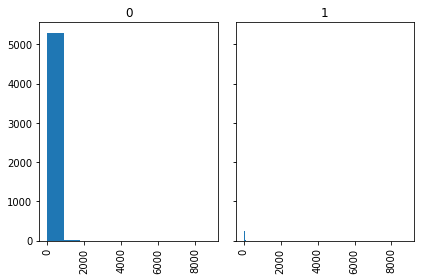

In [12]:
model_data.hist(by='churn', column = 'time_spent', sharex=True, sharey=True)
plt.tight_layout()

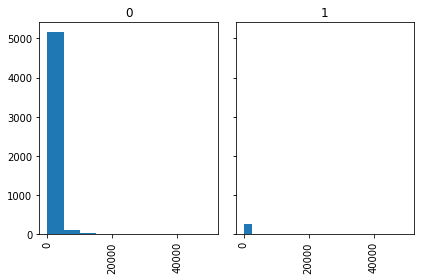

In [13]:
model_data.hist(by='churn', column = 'first_deposit_amount', sharex=True, sharey=True)
plt.tight_layout()

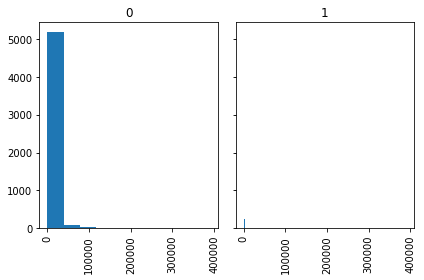

In [14]:
model_data.hist(by='churn', column = 'avg_bal_gt10_l30d', sharex=True, sharey=True)
plt.tight_layout()

In [15]:
## Check correlation matrix
corrmat = model_data.corr()
top_corr_features = corrmat.index

In [16]:
corrmat

,time_spent,first_deposit_amount,churn,n_days_gt10_l30d,avg_bal_gt10_l30d
time_spent,1.000000,-0.000770,-0.004174,-0.006491,-0.004134
first_deposit_amount,-0.000770,1.000000,-0.029502,0.053744,0.306796
churn,-0.004174,-0.029502,1.000000,-0.348408,-0.048458
n_days_gt10_l30d,-0.006491,0.053744,-0.348408,1.000000,0.068452
avg_bal_gt10_l30d,-0.004134,0.306796,-0.048458,0.068452,1.000000


In [17]:
model_data.groupby('risk_tolerance').agg({'churn': ['mean','count','sum']})

churn           
                         mean count  sum
risk_tolerance                          
high_risk_tolerance  0.038418  3566  137
low_risk_tolerance   0.112971   239   27
med_risk_tolerance   0.062395  1779  111

In [18]:
model_data.groupby('instrument_type_first_traded').agg({'churn': ['mean','count','sum'], 
                                                        'n_days_gt10_l30d': ['mean']})

n_days_gt10_l30d     churn           
                                         mean      mean count  sum
instrument_type_first_traded                                      
0                                   21.923077  0.076923    13    1
adr                                 21.411168  0.035533   197    7
cef                                 21.650000  0.050000    20    1
etp                                 21.548303  0.049608   383   19
lp                                  21.625000  0.125000     8    1
mlp                                 21.018182  0.054545    55    3
reit                                21.490909  0.018182    55    1
rlt                                 21.777778  0.000000     9    0
stock                               21.135902  0.049720  4827  240
tracking                            22.000000  0.000000     1    0
wrt                                 20.000000  0.125000    16    2

## Preprocessing the data

In [19]:
cat_cols = []
for c in model_data.columns:
     if model_data[c].dtype == "object" or model_data[c].dtype == "bool":
            cat_cols.append(c)
print(cat_cols)

['risk_tolerance', 'investment_experience', 'liquidity_needs', 'platform', 'instrument_type_first_traded', 'time_horizon']


In [27]:
### OneHot Encoding for Categorical features
model_data_v1 = pd.get_dummies(model_data, columns=cat_cols)

In [21]:
model_data_v1.head()

,time_spent,first_deposit_amount,churn,n_days_gt10_l30d,avg_bal_gt10_l30d,risk_tolerance_high_risk_tolerance,risk_tolerance_low_risk_tolerance,risk_tolerance_med_risk_tolerance,investment_experience_extensive_investment_exp,investment_experience_good_investment_exp,...,instrument_type_first_traded_lp,instrument_type_first_traded_mlp,instrument_type_first_traded_reit,instrument_type_first_traded_rlt,instrument_type_first_traded_stock,instrument_type_first_traded_tracking,instrument_type_first_traded_wrt,time_horizon_long_time_horizon,time_horizon_med_time_horizon,time_horizon_short_time_horizon
0,33.129417,40.0,0,22,80.800000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,16.573517,200.0,0,22,387.156364,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,10.008367,25.0,0,22,49.240000,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1.031633,100.0,0,22,191.885000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,8.187250,20.0,0,22,162.414545,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
### Change churn lable as object
### model_data_v1['churn'] = model_data_v1['churn'].astype('object')

In [28]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
churn=class_le.fit_transform(model_data_v1['churn'].values)
churn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_data_v1.dtypes

## Develop randomForest Model

In [29]:
## create feature data for model training
X = np.array(model_data_v1.drop('churn', axis=1))

In [30]:
## create churn label data for model training
y = np.array(model_data_v1['churn'])
##y

In [31]:
##Splitting data into 70% training and 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


('Labels counts in y:', array([5309,  275]))
('Labels counts in y_train:', array([3716,  192]))
('Labels counts in y_test:', array([1593,   83]))


In [32]:
print('labels counts in y:', len(y))
print('labels counts in y_train:', len(y_train))
print('Labels counts in y_test:',len(y_test))

('labels counts in y:', 5584)
('labels counts in y_train:', 3908)
('Labels counts in y_test:', 1676)


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',
                                n_estimators=100,   
                                random_state=1, 
                                n_jobs=2)   

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## Model evaluation metrics and plots

In [35]:
from sklearn.metrics import confusion_matrix

y_test_pred = rf.predict(X_test)
confmat = pd.DataFrame(
        confusion_matrix(y_true=y_test, y_pred=y_test_pred),
        index=['true:no-churn','true:churn'],
        columns=['pred:no-churn','pred:churn'])
        
print(confmat)


               pred:no-churn  pred:churn
true:no-churn           1586           7
true:churn                75           8


In [53]:
y_train_pred = rf.predict(X_train)
confmat = pd.DataFrame(
        confusion_matrix(y_true=y_train, y_pred=y_train_pred),
        index=['true:no-churn','true:churn'],
        columns=['pred:no-churn','pred:churn'])
        
print(confmat)

               pred:no-churn  pred:churn
true:no-churn           3716           0
true:churn                 0         192


In [56]:
y_pred = np.concatenate((y_train_pred, y_test_pred))
y_all = np.concatenate((y_train, y_test))

confmat = pd.DataFrame(
        confusion_matrix(y_true=y_all, y_pred=y_pred),
        index=['true:no-churn','true:churn'],
        columns=['pred:no-churn','pred:churn'])
        
print(confmat)


               pred:no-churn  pred:churn
true:no-churn           5302           7
true:churn                75         200


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=rf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.94897959 0.94897959 0.95396419 0.95140665 0.95140665 0.95140665
 0.94871795 0.94871795 0.95384615 0.95384615]
CV accuracy: 0.951 +/- 0.002


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

def evaluate(rf, X_test, y_test):
    y_test_pred = rf.predict(X_test)
    y_test_prob = rf.predict_proba(X_test)[:,1]
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_test_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_test_pred))
    print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_test_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))
    
   
    rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_test_prob)
    rf_pr_auc = auc(rf_recall, rf_precision)
    print('PR curve AUC score: %.3f' % rf_pr_auc)
    print('ROC AUC score: %.3f' % roc_auc_score(y_test, y_test_prob))

In [43]:
evaluate(rf, X_test, y_test)

Precision: 0.533
Recall: 0.096
F1-score: 0.163
Accuracy: 0.951
PR curve AUC score: 0.269
ROC AUC score: 0.876


In [44]:
y_test_prob = rf.predict_proba(X_test)[:,1]

### Plot the precision-recall curves

In [46]:
from sklearn.metrics import precision_recall_curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_test_prob)
rf_auc = auc(rf_recall, rf_precision)

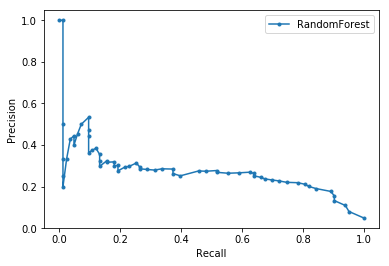

In [47]:
# plot the precision-recall curves
plt.plot(rf_recall, rf_precision, marker='.', label='RandomForest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [51]:
# calculate ROC AUC
print('PR curve AUC: %.3f' % rf_auc)

PR curve AUC: 0.269


### Plot the roc curve for the model

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# calculate roc curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_test_prob)

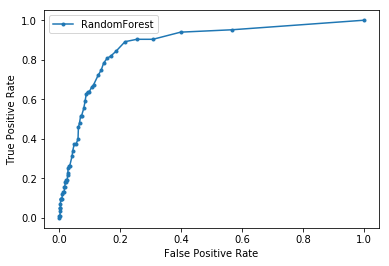

In [49]:
# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_test_prob)
print('AUC: %.3f' % roc_auc)


AUC: 0.876


## Tuning hyperparameters via grid search

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', ## 'entropy',
                               ## n_estimators=100,   
                                random_state=1, 
                                n_jobs=2)   

In [62]:
n_estimators = [100, 150, 200]  ###the number of trees in the forest of the model. 
max_depth = [10, 20, 30, 50]   ## the maximum depth of each tree.
min_samples_split = [2, 5, 10, 20] ## the minimum number of samples required to split an internal leaf node.
min_samples_leaf = [1, 2, 4, 8]  ## the minimum number of samples required to be at a leaf node. 

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gs = GridSearchCV(forest, param_grid, cv = 3,  scoring='recall', verbose = 1, n_jobs = -1) ## scoring='accuracy', 
bestF = gs.fit(X_train, y_train)
print(bestF.best_score_)
print(bestF.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   30.1s finished


0.04166133572159673
{'min_samples_split': 5, 'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 1}


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(criterion='gini',
                                n_estimators=100,  
                                min_samples_split=5,
                                max_depth=30,
                                min_samples_leaf=1,
                                random_state=1, 
                                n_jobs=2)  

rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [63]:
evaluate(bestF,X_test, y_test) ## optimiza recall

Precision: 0.714
Recall: 0.060
F1-score: 0.111
Accuracy: 0.952
PR curve AUC score: 0.286
ROC AUC score: 0.876


In [61]:
evaluate(rf_best,X_test, y_test) ## optimiza F1

Precision: 0.571
Recall: 0.048
F1-score: 0.089
Accuracy: 0.951
PR curve AUC score: 0.295
ROC AUC score: 0.876


In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_wgt = RandomForestClassifier(criterion='gini',
                                n_estimators=100,  
                                class_weight='balanced',
                                random_state=1, 
                                n_jobs=2)  

rf_wgt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
evaluate(rf_wgt,X_test, y_test)

Precision: 0.444
Recall: 0.048
F1-score: 0.087
Accuracy: 0.950
PR curve AUC score: 0.233
ROC AUC score: 0.866


In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_wgt2 = RandomForestClassifier(criterion='gini',
                                n_estimators=100,  
                                class_weight='balanced_subsample',
                                random_state=1, 
                                n_jobs=2)  

rf_wgt2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [112]:
evaluate(rf_wgt2,X_test, y_test)

Precision: 0.300
Recall: 0.036
F1-score: 0.065
Accuracy: 0.948
PR curve AUC score: 0.236
ROC AUC score: 0.873


## select a model to assgin churn probability  

In [65]:
# Select the rf model based on the best F1 score
#y_test_prob = rf.predict_proba(X_test)[:,1]

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_pred = np.concatenate((y_train_pred, y_test_pred))


In [80]:
X_df = model_data_v1.drop('churn', axis=1)
y_pred = rf.predict (X_df)

In [92]:
y_pred_df = pd.DataFrame(data = y_pred, columns = ['y_pred'], index = X_df.index.copy())
model_data_out = pd.merge(model_data_raw, y_pred_df, how = 'left', left_index = True, right_index = True)

In [93]:
model_data_out.head()

,Unnamed: 0,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn,n_days_gt10_l30d,avg_bal_gt10_l30d,y_pred
0,1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0,22,80.800000,0
1,2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0,22,387.156364,0
2,3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0,22,49.240000,0
3,4,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0,22,191.885000,0
4,5,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0,22,162.414545,0


In [94]:
y_prob = rf.predict_proba(X_df)[:,1]
y_prob_df = pd.DataFrame(data = y_prob, columns = ['y_prob'], index = X_df.index.copy())
model_data_out_v2 = pd.merge(model_data_out, y_prob_df, how = 'left', left_index = True, right_index = True)

In [95]:
model_data_out_v2.head()

,Unnamed: 0,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn,n_days_gt10_l30d,avg_bal_gt10_l30d,y_pred,y_prob
0,1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0,22,80.800000,0,0.01
1,2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0,22,387.156364,0,0.00
2,3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0,22,49.240000,0,0.00
3,4,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0,22,191.885000,0,0.01
4,5,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0,22,162.414545,0,0.01


In [97]:
model_data_out_v2.to_csv('model_data_out.csv')

## Print and Plot feature importance

In [98]:
importances = rf.feature_importances_
importances

array([1.65760251e-01, 1.32198381e-01, 2.34591305e-01, 2.11575202e-01,
       1.70940426e-02, 1.04669215e-02, 1.60396548e-02, 2.58034463e-03,
       1.34455747e-02, 2.05347992e-02, 1.90257019e-02, 8.25478802e-03,
       1.29711782e-02, 1.49764788e-02, 1.19592124e-02, 1.32996364e-02,
       1.46906732e-02, 2.33909850e-03, 4.01836918e-03, 7.53897612e-04,
       9.41570607e-03, 9.37294743e-05, 3.89873601e-03, 4.90649297e-04,
       2.82731678e-05, 1.07365948e-02, 3.62311151e-07, 1.64058355e-03,
       1.72666429e-02, 1.25429177e-02, 1.73102945e-02])

In [99]:
importances.shape

(31,)

In [100]:
feat_labels = model_data_v1.drop('churn', axis=1).columns[0:]
indices = np.argsort(importances)[::-1]  ### revert sort

In [101]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 50, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


 1) n_days_gt10_l30d                                   0.234591
 2) avg_bal_gt10_l30d                                  0.211575
 3) time_spent                                         0.165760
 4) first_deposit_amount                               0.132198
 5) investment_experience_limited_investment_exp       0.020535
 6) investment_experience_no_investment_exp            0.019026
 7) time_horizon_short_time_horizon                    0.017310
 8) time_horizon_long_time_horizon                     0.017267
 9) risk_tolerance_high_risk_tolerance                 0.017094
10) risk_tolerance_med_risk_tolerance                  0.016040
11) liquidity_needs_very_important_liq_need            0.014976
12) platform_iOS                                       0.014691
13) investment_experience_good_investment_exp          0.013446
14) platform_both                                      0.013300
15) liquidity_needs_somewhat_important_liq_need        0.012971
16) time_horizon_med_time_horizon       

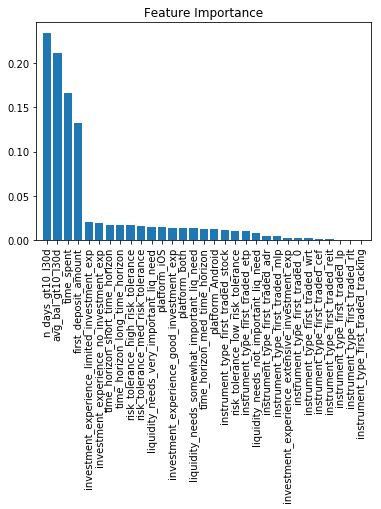

In [102]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
plt.show()
